In [540]:
import numpy as np
np.random.seed(0)

#Activation functions

def sin_function(x):
    return np.sin(x)

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

#Function to approximate
def f(x):
    return np.sin(3*np.pi*x + 3*np.pi/20) * np.cos(2*np.pi*x + np.pi/10) + 2


In [541]:
#Function to build the mass matrix - M
from scipy.integrate import quad

def mass_matrix(func,sigma, weights, biases, neurons):
    M = np.zeros([neurons, neurons])
    
    for i in range(0, neurons):
        for j in range(0, neurons):
            M[i, j] = quad(func, 0, 1, args=(weights, biases,i+1,j+1,sigma), limit=1000)[0]

    return M

In [542]:
#Single basis function - Neural Network
def single_neural_net(x,weights,biases,i, sigma): 

    return sigma(weights[i]*x+biases[i])


In [543]:
#Basis function multiplication helper for quadrature
def double_neural_net(x,weights,biases,i,j, sigma): 

    return single_neural_net(x,weights,biases,i-1,sigma)*single_neural_net(x,weights,biases,j-1,sigma)
    #return sigma(x-(i/n))*sigma(x-(j/n))

In [544]:
#Bias helper function for quadrature
def b_neural_net(x, weights, biases,i, sigma,f):
    return single_neural_net(x,weights,biases,i, sigma)*f(x)


In [545]:
#quadrature for the bias matrix - B
def b_matrix(func,sigma, weights, biases,f, neurons):
    b = np.zeros([neurons, 1])
    for i in range(0, neurons):
            b[i] = quad(func, 0, 1, args=(weights, biases,i,sigma,f), limit=1000)[0]

    return b

In [546]:
#Function to build the approximation vector
def u_nn(x, weights, biases, sigma,collocation, neurons, a):
    u = np.zeros(collocation)
    
    for j in range(0,collocation):
        for i in range(0,neurons):
            
            u[j] += single_neural_net(x[j], weights, biases, i, sigma)*a[i]
        
    return u


In [547]:
#helper function for eigenvalues and eigenvectors
from scipy.linalg import eig
def get_eig(M):
    D,V = eig(M, left=False, right=True)


    idx = D.argsort()[::-1]   
    D = D[idx]
    V = V[:,idx]

    D = np.flip(D)
    V = np.fliplr(V)

    return D,V

In [548]:
#Function to calculate L2 loss
def l2_loss(f_x, u_nn_result):
    return np.linalg.norm(f_x - u_nn_result)**2

In [549]:
#Function to build the Phi matrix, made up of n basis functions
def phi_matrix(x,weights,biases,sigma,neurons,collocation):
    phi = np.zeros((collocation,neurons))
    for i in range(0,neurons):
        for j in range(0,collocation):

            phi[j,i] = sigma(weights[i]*x[j]+biases[i])
    return phi


In [550]:
collocation = 100
neurons = 10  
x = np.linspace(0,1,collocation)
weights = np.random.uniform(-1,1,neurons)
biases = np.random.uniform(-1,1,neurons)

In [551]:
phi = phi_matrix(x,weights,biases,tanh,neurons,collocation)

In [552]:
def evaluate_func_approx(x,f, weights, biases, sigma, neurons, collocation,verbose=False):
    phi = phi_matrix(x,weights,biases,sigma,neurons,collocation)
    f_func = f(x)
    a = np.linalg.pinv(phi)@f_func

    u = u_nn(x, weights, biases, sigma, collocation,neurons, a)

    loss = l2_loss(f_func, u)
    if verbose:
        print("="*20)
        print("Sigma:", sigma.__name__)
        print("Number of collocation points:", collocation)
        print("Number of neurons:", neurons)
        print("L2 Loss:", loss)
        print("="*20)
    return loss

In [553]:
collocation = 100
neurons = 5
sigma = tanh
x = np.linspace(0,1,collocation)
weights = np.random.uniform(-1,1,neurons)
biases = np.random.uniform(-1,1,neurons)
test = evaluate_func_approx(x,f, weights, biases, sigma, neurons, collocation,verbose=True)

Sigma: tanh
Number of collocation points: 100
Number of neurons: 5
L2 Loss: 10.40852658597921


In [554]:
import matplotlib.pyplot as plt

def compute_loss_values(neurons, collocations, sigmas, verbose=False):
    loss_values = []
    for sigma in sigmas:
        for neuron in neurons:
            for collocation in collocations:
                x = np.linspace(0, 1, collocation)
                weights = np.random.uniform(-1, 1, neuron)
                biases = np.random.uniform(-1, 1, neuron)
                loss = evaluate_func_approx(x, f, weights, biases, sigma, neuron, collocation, verbose=verbose)
                loss_values.append((loss, collocation, neuron, sigma.__name__))  # Add activation function name
    return loss_values

In [564]:
neurons = list(range(1, 21))
sigmas = [tanh,relu,sin_function]
collocations = [50]
loss_values = compute_loss_values(neurons, collocations,sigmas,verbose=False)

In [565]:
loss_values

[(8.885930436727213, 50, 1, 'tanh'),
 (5.906669850319542, 50, 2, 'tanh'),
 (5.5962130115527655, 50, 3, 'tanh'),
 (5.298062522171955, 50, 4, 'tanh'),
 (5.217904882113145, 50, 5, 'tanh'),
 (4.365037361744913, 50, 6, 'tanh'),
 (1.5693364474773004, 50, 7, 'tanh'),
 (2.7479032091555657, 50, 8, 'tanh'),
 (0.09421262853416287, 50, 9, 'tanh'),
 (0.02950656390454867, 50, 10, 'tanh'),
 (0.005845864795441691, 50, 11, 'tanh'),
 (0.0003613447299226297, 50, 12, 'tanh'),
 (0.003684242313894223, 50, 13, 'tanh'),
 (0.006004402204053347, 50, 14, 'tanh'),
 (2.6167199406337425e-05, 50, 15, 'tanh'),
 (7.571405742874123e-05, 50, 16, 'tanh'),
 (5.5969628150546015e-05, 50, 17, 'tanh'),
 (4.811707241936971e-05, 50, 18, 'tanh'),
 (1.9541076050063763e-05, 50, 19, 'tanh'),
 (3.2544656069793455e-05, 50, 20, 'tanh'),
 (275.33261291936486, 50, 1, 'relu'),
 (12.20583467597576, 50, 2, 'relu'),
 (83.46991678515127, 50, 3, 'relu'),
 (15.822271654820332, 50, 4, 'relu'),
 (6.259352705984114, 50, 5, 'relu'),
 (5.8713871938

In [566]:
collocation_loss_data = {collocation: [] for collocation in collocations}

for i, (loss, collocation, neuron, activation_func_name) in enumerate(loss_values):
    collocation_loss_data[collocation].append((neuron, loss, activation_func_name))

for activation_func_name in set(activation_func_name for _, _, _, activation_func_name in loss_values):
    print(f"Activation Function: {activation_func_name}")
    for collocation, data in collocation_loss_data.items():
        print(f"# of Collocation points: {collocation}")
        for neuron, loss, act_func_name in data:
            if act_func_name == activation_func_name:
                print(f"  # of Neurons: {neuron}, Loss: {loss:.10e}")


Activation Function: tanh
# of Collocation points: 50
  # of Neurons: 1, Loss: 8.8859304367e+00
  # of Neurons: 2, Loss: 5.9066698503e+00
  # of Neurons: 3, Loss: 5.5962130116e+00
  # of Neurons: 4, Loss: 5.2980625222e+00
  # of Neurons: 5, Loss: 5.2179048821e+00
  # of Neurons: 6, Loss: 4.3650373617e+00
  # of Neurons: 7, Loss: 1.5693364475e+00
  # of Neurons: 8, Loss: 2.7479032092e+00
  # of Neurons: 9, Loss: 9.4212628534e-02
  # of Neurons: 10, Loss: 2.9506563905e-02
  # of Neurons: 11, Loss: 5.8458647954e-03
  # of Neurons: 12, Loss: 3.6134472992e-04
  # of Neurons: 13, Loss: 3.6842423139e-03
  # of Neurons: 14, Loss: 6.0044022041e-03
  # of Neurons: 15, Loss: 2.6167199406e-05
  # of Neurons: 16, Loss: 7.5714057429e-05
  # of Neurons: 17, Loss: 5.5969628151e-05
  # of Neurons: 18, Loss: 4.8117072419e-05
  # of Neurons: 19, Loss: 1.9541076050e-05
  # of Neurons: 20, Loss: 3.2544656070e-05
Activation Function: relu
# of Collocation points: 50
  # of Neurons: 1, Loss: 2.7533261292e+02

In [558]:
def plot_loss_vs_neurons(loss_values_neuron, collocations):
    plt.figure(figsize=(10, 6))
    
    for collocation in collocations:
        losses = [loss for loss, col, neuron in loss_values_neuron if col == collocation]
        neurons = [neuron for loss, col, neuron in loss_values_neuron if col == collocation]
        plt.plot(neurons, losses, label=f'Collocation: {collocation}')
    
    plt.title('Loss vs. Number of Neurons')
    plt.xlabel('Number of Neurons')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_loss_vs_neurons(loss_values, collocations)

ValueError: too many values to unpack (expected 3)

<Figure size 1000x600 with 0 Axes>

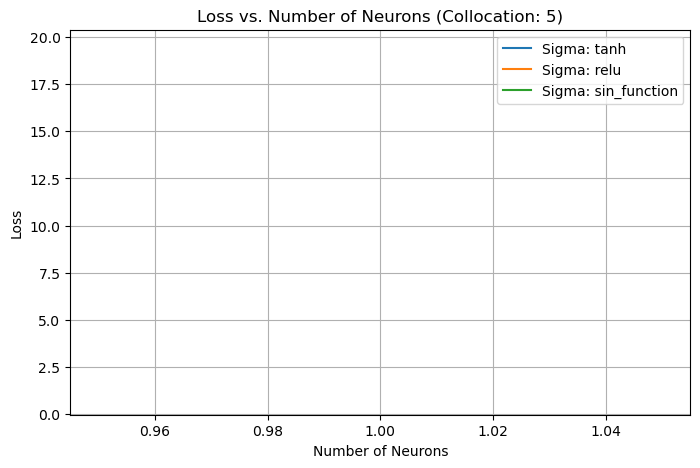

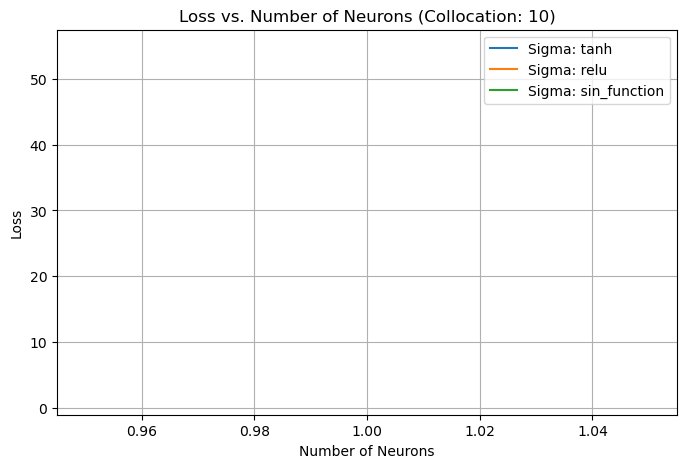

In [ ]:
def plot_loss_vs_neurons_separate(loss_values_neuron, collocations):
    for collocation in collocations:
        plt.figure(figsize=(8, 5))
        losses = [loss for loss, col, neuron in loss_values_neuron if col == collocation]
        neurons = [neuron for loss, col, neuron in loss_values_neuron if col == collocation]
        plt.plot(neurons, losses)
        plt.title(f'Loss vs. Number of Neurons (Collocation: {collocation})')
        plt.xlabel('Number of Neurons')
        plt.ylabel('Loss')
        plt.grid(True)
        plt.show()
    
plot_loss_vs_neurons_separate(loss_values, collocations)

# Building Mass matrix

In [ ]:
# M = mass_matrix(double_neural_net,relu,weights, biases,n)
# M

In [ ]:
# np.linalg.det(M)

In [ ]:
# b = b_matrix(b_neural_net,relu,weights, biases,f,n)
#b

In [ ]:
# a = np.linalg.solve(M,b)
#a

In [ ]:
# x= np.linspace(0,1,n)
# u = u_nn(x,weights,biases,sin_function,n,a)

In [ ]:
# u

In [ ]:
# loss = l2_loss(f(x), u)
# print("L2 Loss:", loss)